# **The universal approximation theorem**

**Disclaimer**: large parts of the lab are taken from [this webpage](https://towardsdatascience.com/understand-universal-approximation-theorem-with-code-774dcef55731).

--> We can approximate any continuous function with this basic structure

**ISSUE** We have to fix the seed otherwise, we cannot talk about replicability. Not ever

Let us test the ability of standard single-hidden-layer feedforward Neural Network of finite number of hidden neurons of approximating continuous functions by means of an arbitrary activation function.

The theorem has its variants related to the number of layers for fixed number of neurons. Or, for fixed number of neurons and layers, one can choose a proper activation function (is it really feasible?)

We will focus on changing the structure of the problem in order to get a more "connected" Neural Network able to better capture the features of the data.

In [1]:
# Downloading dependencies:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn # To Neural Network
import torch.optim as optim

In [2]:
### Setting function to approximate ###

# y = x^2 --> PURPOSE: we want to approximate a parabola
x = np.linspace(-30,30,100)
y = x**2

Working on the universal approximation theorem means _changing_ the parameters and the structure of the net:
* number of neurons
* number of layers
* learning rate (very important!) and optimization process ([LOOK!](https://imgur.com/a/Hqolp)) --> tell me how fast I go on the direction
* number of epochs (duration of the training process) 
* activation function (.... _really?_ ....) --> related to what you expect from your problem

In [3]:
# Net definition #

n_neurons = 10  # number of neurons/nodes
learning_rate = 5e-3 # learning rate

# I call the NN of torch and I use a multy layer perceptron (fully connected)
# Sequential construct a fully connected NN with the layer that you define
model = nn.Sequential(     
          nn.Linear(1, n_neurons), # Linear layer
          nn.ReLU(), # Activation function
          # nn.Linear(n_neurons,n_neurons),
          # nn.ReLU(),        
          nn.Linear(n_neurons,1),
          nn.ReLU()
          )


# Set up  : Input (1 Node) -> Hidden (n_neurons nodes) -> Output (1 Node) 
# Set up 2: Input (1 Node) -> Hidden (n_neurons nodes) -> Hidden (n_neurons nodes) -> Output (1 Node)

# Important Note: If you increase the number of neurons or use a harder function to approximate, try tuning the learning rate.
#                 Tuning the learning rate is vital to properly train the network.

optimizer = optim.RMSprop(model.parameters(), lr=learning_rate) # define optimizer
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# The objective that you want to minimize
criterion = nn.MSELoss() # define loss function --> Mean Square Error

Let us train the net!

The train takes a little bit of time

In [5]:
# Training #

# Convert to tensor form with batch for PyTorch model.
inputs = torch.tensor(x).view(-1,1) # Take the lat dimenison
labels = torch.tensor(y).view(-1,1) # Play a little bit with the data - dimenision

# Important Note 2: Change epochs
epochs = 20000

for epoch in range(epochs):  # loop over the data multiple times
   
    # zero the parameter gradients
    optimizer.zero_grad()
   
    # forward + backward + optimize
    # Every time, backpropagete and update the model
    outputs = model(inputs.float()) 
    loss = criterion(outputs, labels.float()) # Compute the loss
    loss.backward() # Compute the gradient for the backpropagation step
    optimizer.step() # The bias is updated

Let us test the model! 

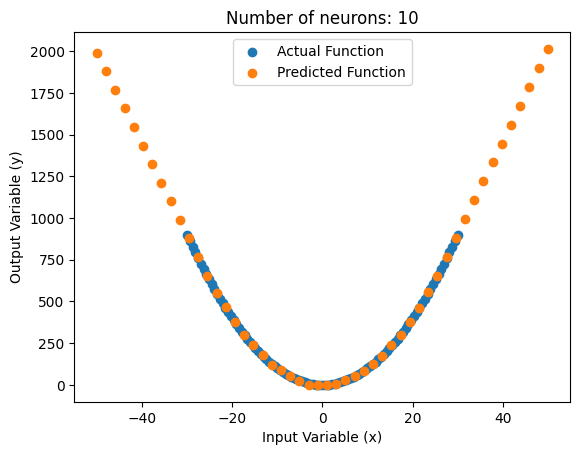

In [6]:
### Running Inference over the trained model ***********  #
x_test = np.linspace(-50,50,50) # We take a data outside from the data that we gave for the training part

with torch.no_grad():
    test_inputs = torch.tensor(x_test).view(len(x_test),-1).float()
    y_hat = model(test_inputs)
    y_hat = y_hat.detach().numpy()
    
# ******************************************************  #

### Plot results: Actual vs Model Prediction ***********  #
plt.scatter(x,y,label='Actual Function')
plt.scatter(x_test,y_hat,label="Predicted Function")
plt.title(f'Number of neurons: {n_neurons}')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()
# ******************************************************  #

Try other functions and configurations!

**Enjoy!**